<h1>Lego Notebook</h1>

<p>Read colors csv</p>

In [267]:
import pandas as pd

COLORS_FILE = 'data/colors.csv'

df = pd.read_csv(COLORS_FILE)
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [268]:
df['rgb'].nunique()

124

In [269]:
opaque_df = df.loc[df['is_trans']=='f']
opaque_df.shape


(107, 4)

In [270]:
trans_df = df.loc[df.is_trans == 't']
trans_df.shape

(28, 4)

In [271]:
df.is_trans.value_counts()


f    107
t     28
Name: is_trans, dtype: int64

In [272]:
df.groupby(df.is_trans).count()



,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### Understanding Lego Sets vs. Themes
<img src="https://i.imgur.com/aKcwkSx.png">


In [273]:
sets_df = pd.read_csv('data/sets.csv')
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [274]:
sets_df['year'].min()

1949

In [275]:
sets_df['year'].idxmin()

9521

In [276]:
sets_df['name'].loc[9521]

'Extra-Large Gift Set (ABB)'

In [277]:
sets_df.groupby('year').count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [278]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [279]:
import matplotlib.pyplot as plt

sets_by_year = sets_df.groupby(sets_df.year).count()

In [280]:
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [281]:
sets_by_year.tail()

,set_num,name,theme_id,num_parts
year,,,,
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840
2020,674,674,674,674
2021,3,3,3,3


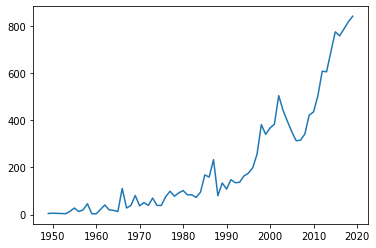

In [282]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [283]:
sets_df.pivot_table(values='num_parts', columns='name', index='year')

name,Spectre,'Where Are My Pants?' Guy,(Me and My) Birthday,(Patty's) Pony Stable,1 stud Blue Storage Brick,1 stud Red Storage Brick,1 x 1 Bricks,1 x 1 Bricks with Letters (System),1 x 1 Bricks with Numbers (System),1 x 1 Round Bricks,...,Zorch,eLAB Renewable Energy Set,"garmadon, Garmadon, GARMADON!",iFountain (Lego / Coca-Cola Employee Exclusive),racer polybag,{Aeroplane},{Basic Promotional Set},{Ducks},{Red Race Car Number 3},{Roadplates and Scenery}
year,,,,,,,,,,,,,,,,,,,,,
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

In [285]:
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [286]:
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)

In [287]:
themes_by_year.head()


,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


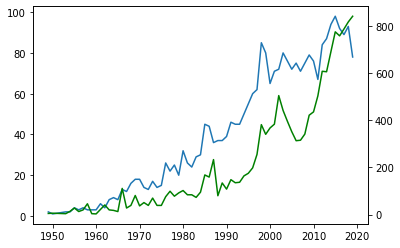

In [288]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
ax2.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='green')

In [289]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean })

In [290]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


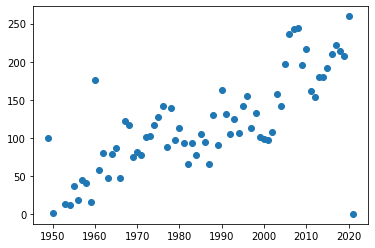

In [291]:
plt.scatter(parts_per_set.index, parts_per_set.num_parts)

In [292]:
set_theme_count = sets_df['theme_id'].value_counts()

In [293]:
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [294]:
sets_df[sets_df.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [295]:
themes_df = pd.read_csv('data/themes.csv')
themes_df.head()


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [296]:
themes_df[themes_df['id'] ==  158]

,id,name,parent_id
150,158,Star Wars,NaN


In [297]:

set_theme_count = sets_df['theme_id'].value_counts()

In [299]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})

In [300]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [301]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')

In [302]:
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
